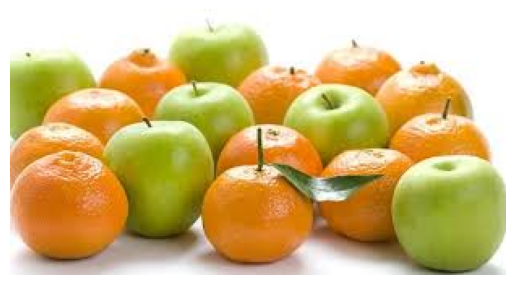

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "C:/Users/ASUS/Downloads/images (2).jpeg"
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


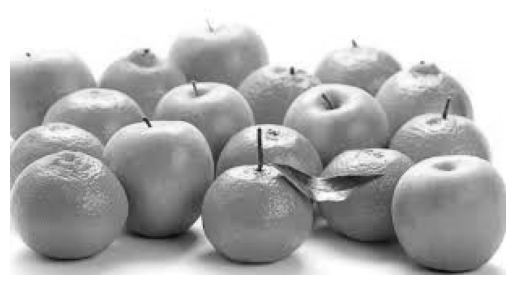

In [13]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


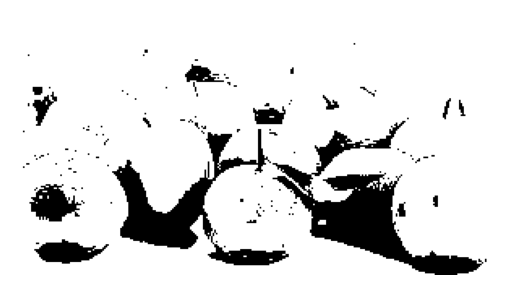

In [14]:
# Apply a binary threshold
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()


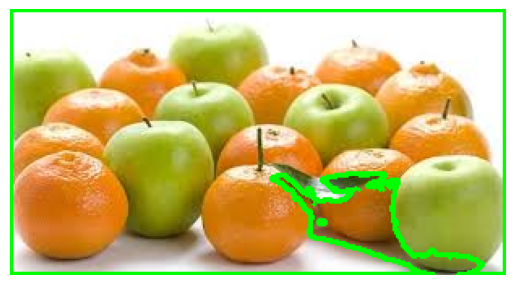

In [15]:
# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(contour_image)
plt.axis('off')
plt.show()


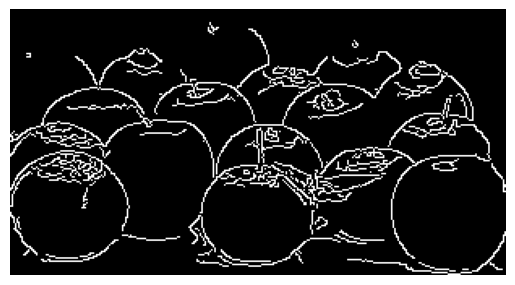

In [16]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


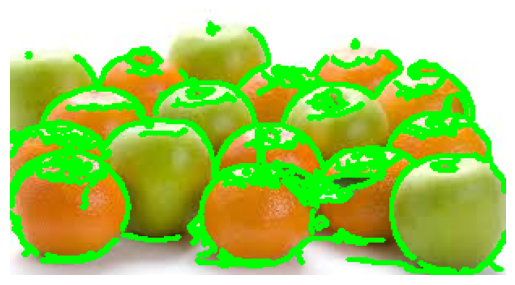

In [17]:
# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(contour_image)
plt.axis('off')
plt.show()


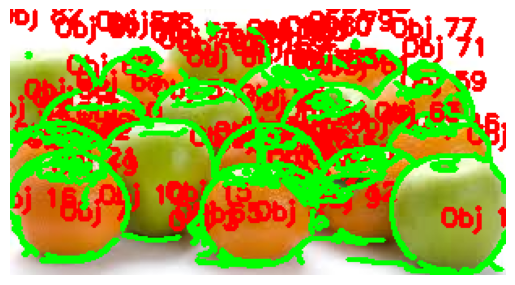

In [26]:
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create a copy of the original image to draw contours
contour_image = image_rgb.copy()

for i, contour in enumerate(contours):
    # Draw each contour with a different color
    color = (0, 255, 0)  # Green color
    cv2.drawContours(contour_image, [contour], -1, color, 2)
    
    # Calculate the centroid for labeling
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    
    # Put the label at the centroid
    cv2.putText(contour_image, f"Obj {i+1}", (cX - 20, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image with labeled contours
plt.imshow(contour_image)
plt.axis('off')
plt.show()


In [28]:
from skimage.feature import graycomatrix, graycoprops

for i, contour in enumerate(contours):
    # Create a mask for the object
    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, [contour], -1, 255, -1)
    
    # Extract the region of interest (ROI)
    roi = cv2.bitwise_and(gray_image, gray_image, mask=mask)
    
    # Compute GLCM for the ROI
    glcm = graycomatrix(roi, distances=[1], angles=[0], symmetric=True, normed=True)
    
    # Compute texture properties
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    print(f"Object {i+1}:")
    print(f"  Contrast = {contrast}")
    print(f"  Energy = {energy}")
    print(f"  Homogeneity = {homogeneity}")
    print(f"  Correlation = {correlation}")


Object 1:
  Contrast = 0.4511395441823271
  Energy = 0.9999000404836567
  Homogeneity = 0.9999016604815014
  Correlation = 0.7512203550251422
Object 2:
  Contrast = 1.7262694922031188
  Energy = 0.9994202350065554
  Homogeneity = 0.9994651770138638
  Correlation = 0.7172048234189703
Object 3:
  Contrast = 6.9526989204318275
  Energy = 0.9994402277095242
  Homogeneity = 0.9994774039746649
  Correlation = 0.7197708753579031
Object 4:
  Contrast = 0.9623350659736107
  Energy = 0.9995401902242884
  Homogeneity = 0.9997354153072154
  Correlation = 0.8422239505545422
Object 5:
  Contrast = 3.5756097560975615
  Energy = 0.9991203578597374
  Homogeneity = 0.9992423312166078
  Correlation = 0.7668347746714866
Object 6:
  Contrast = 4.681327469012396
  Energy = 0.9997001220509697
  Homogeneity = 0.9997024323852062
  Correlation = 0.5169785808213933
Object 7:
  Contrast = 13.497001199520193
  Energy = 0.9982007322246347
  Homogeneity = 0.9983087616945662
  Correlation = 0.6568821818273393
Object 

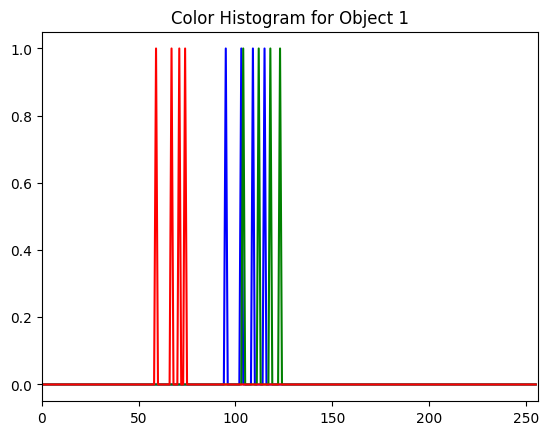

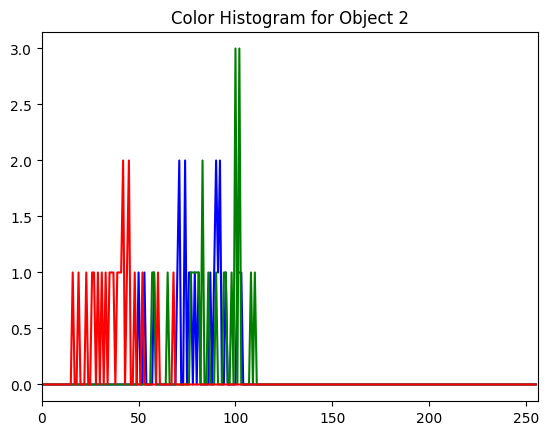

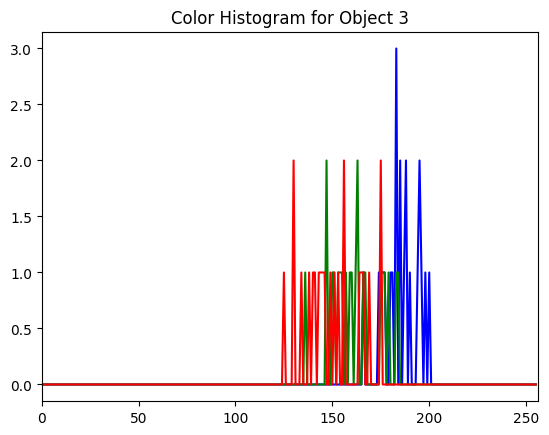

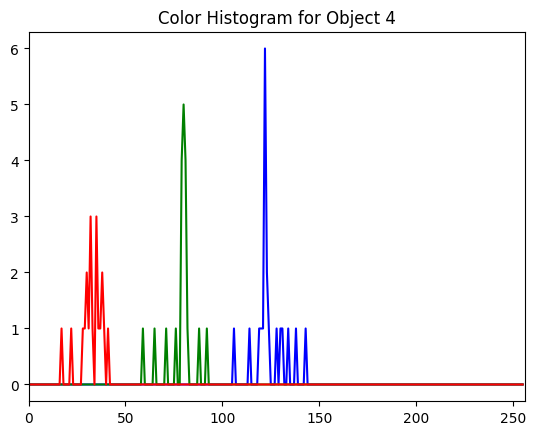

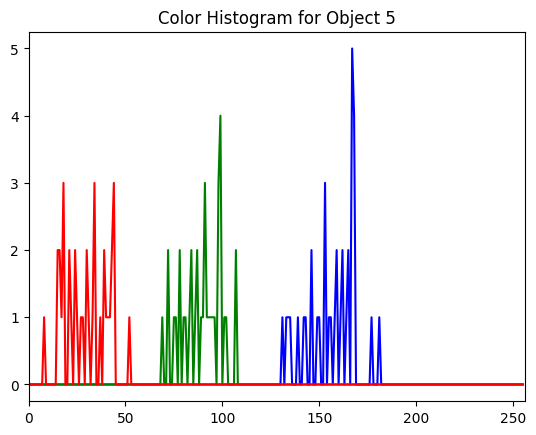

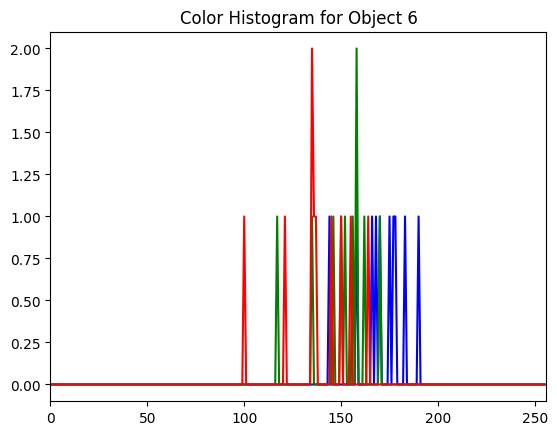

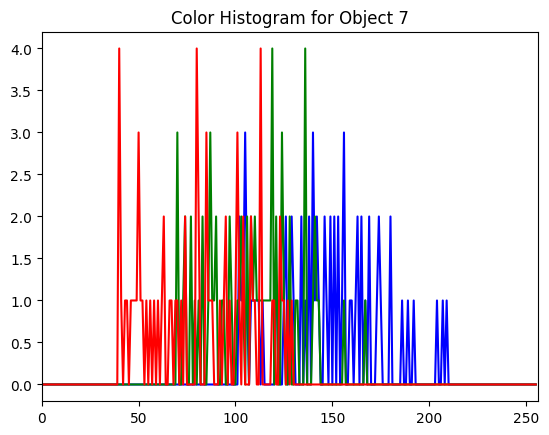

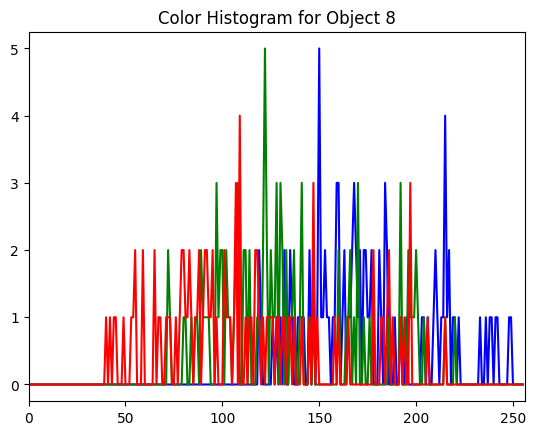

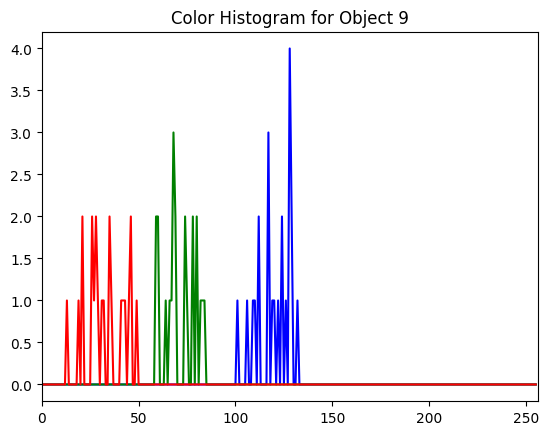

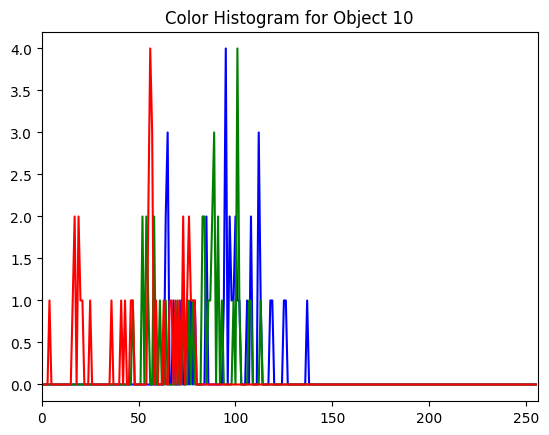

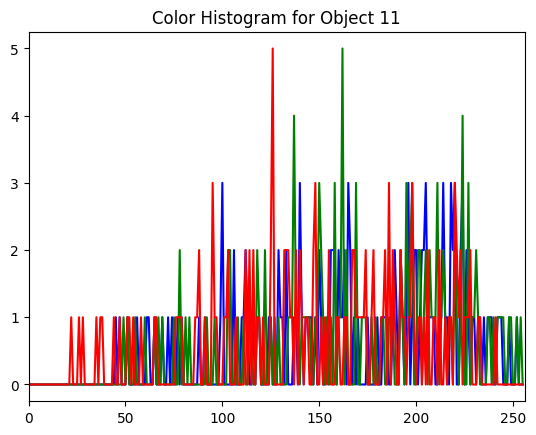

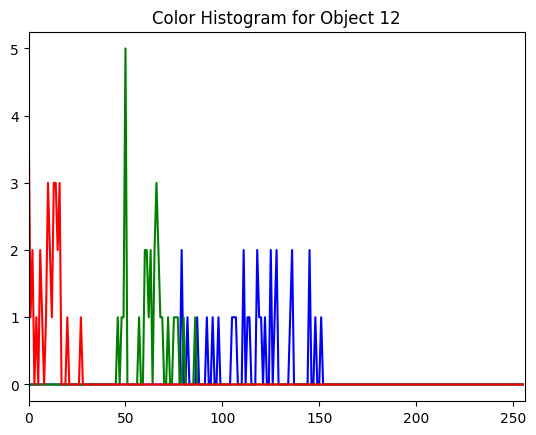

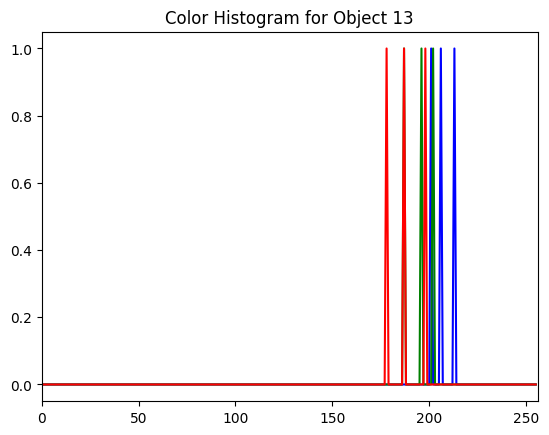

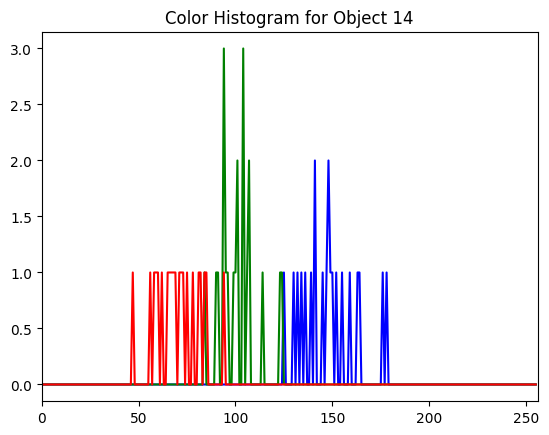

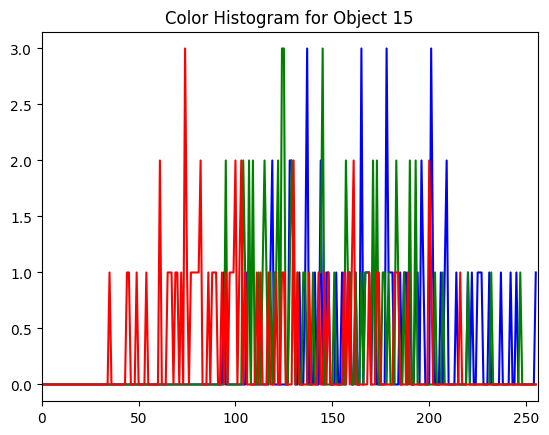

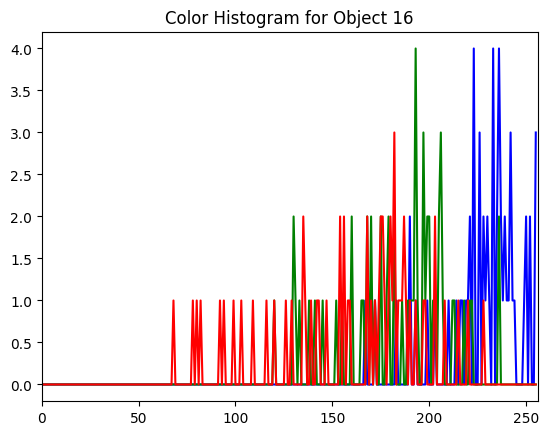

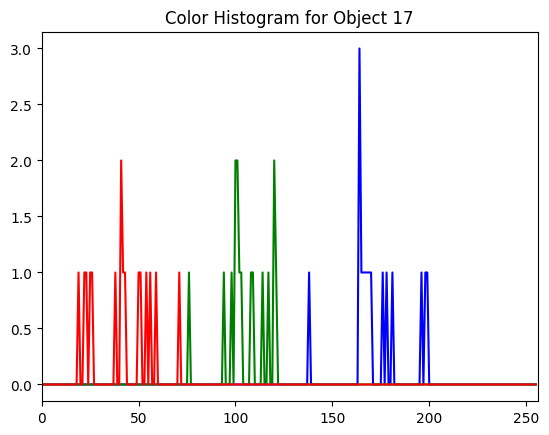

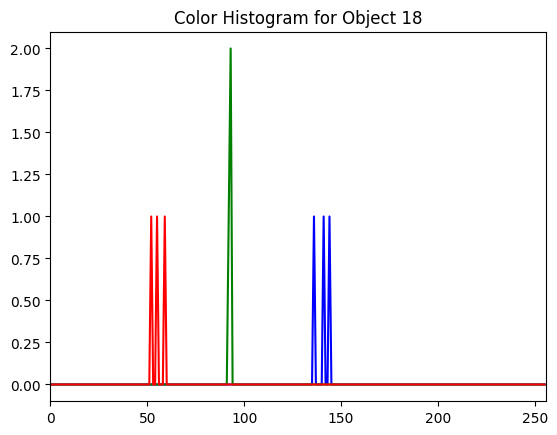

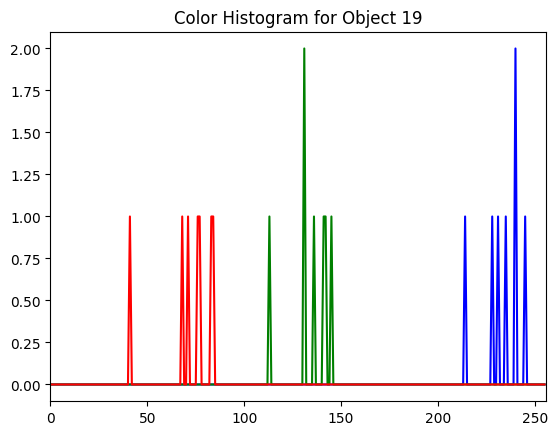

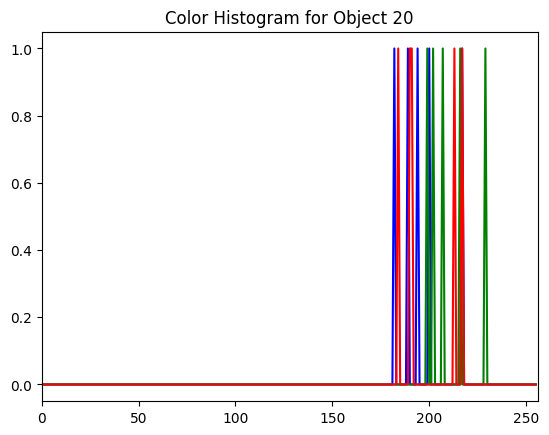

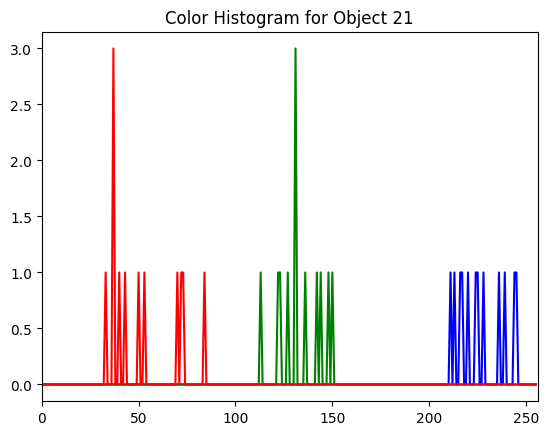

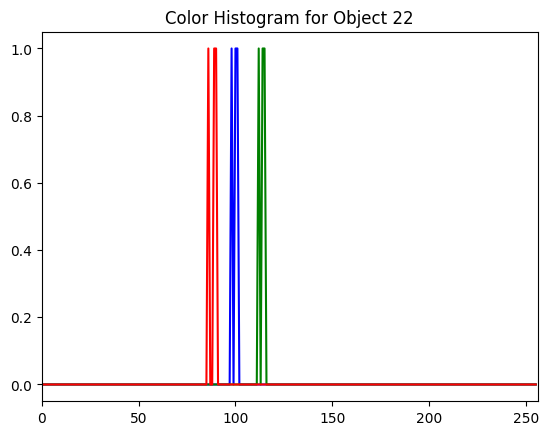

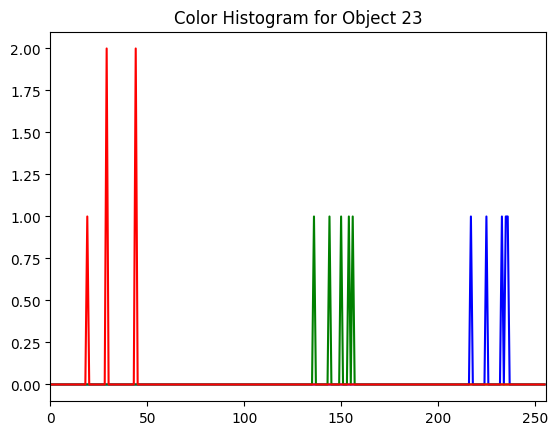

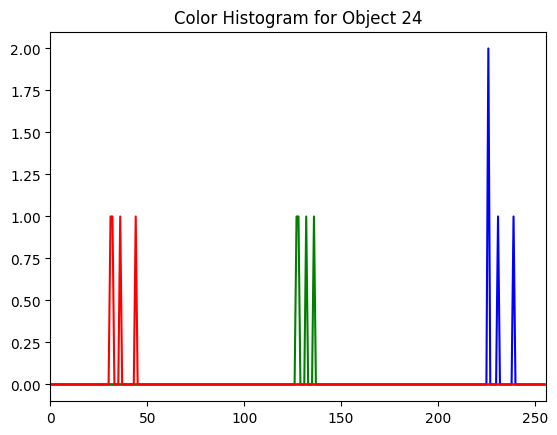

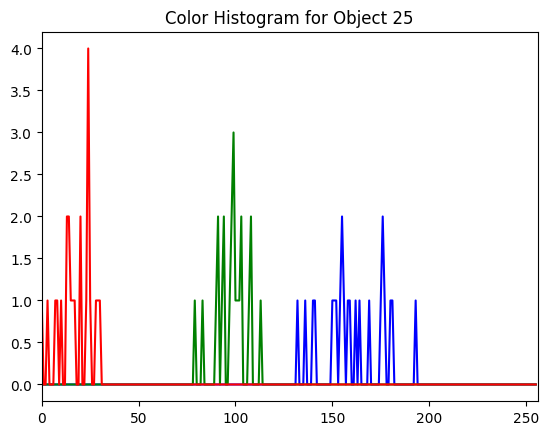

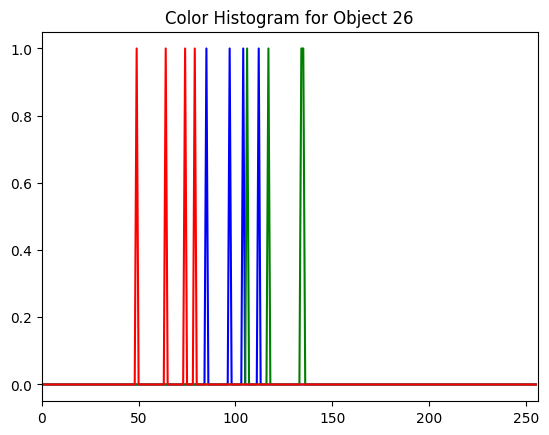

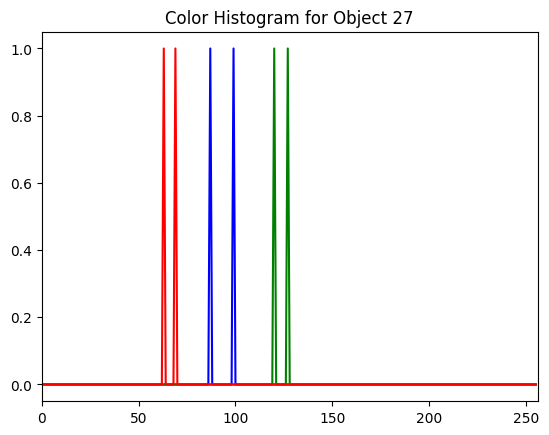

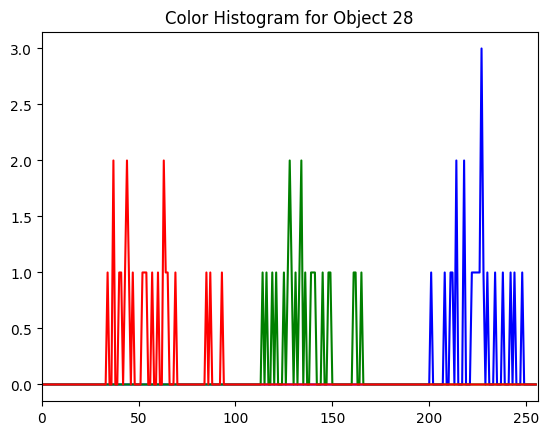

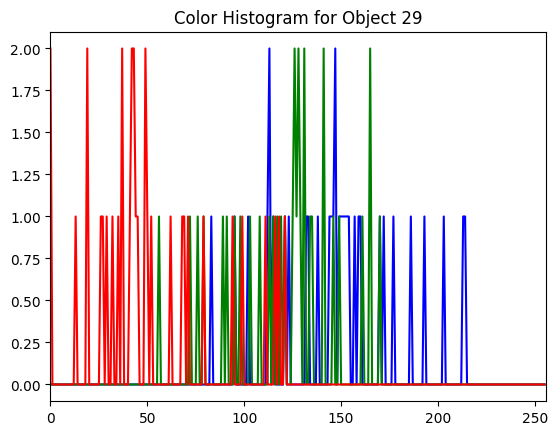

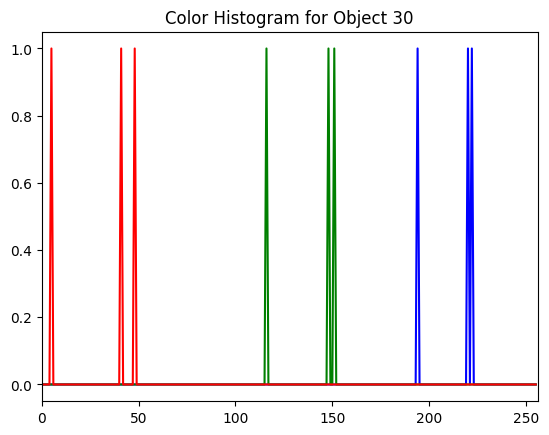

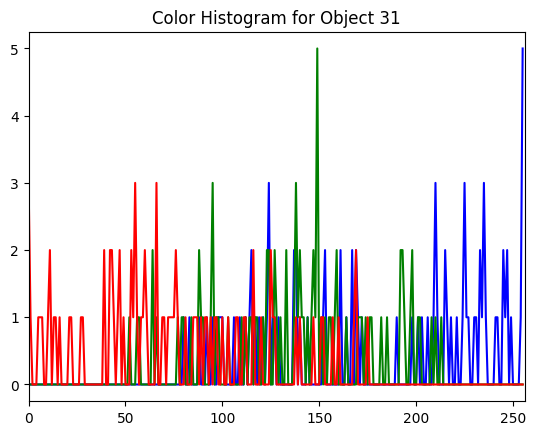

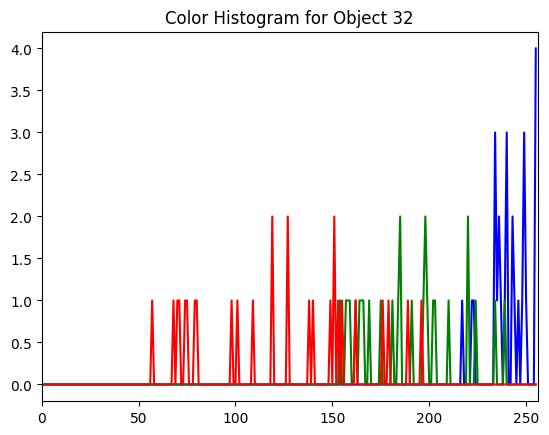

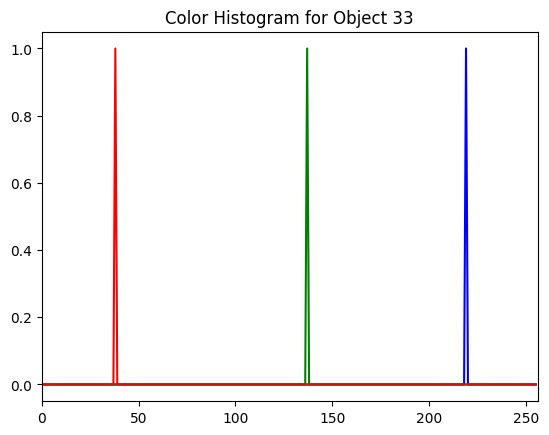

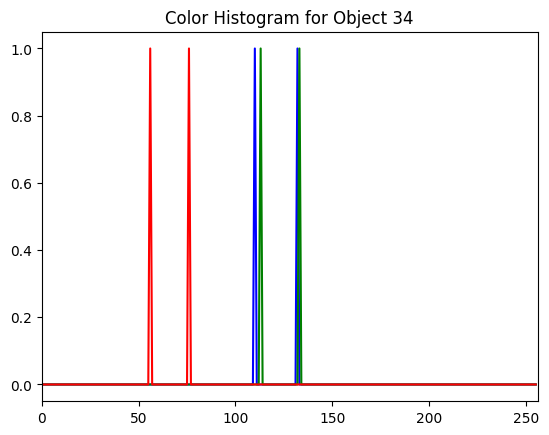

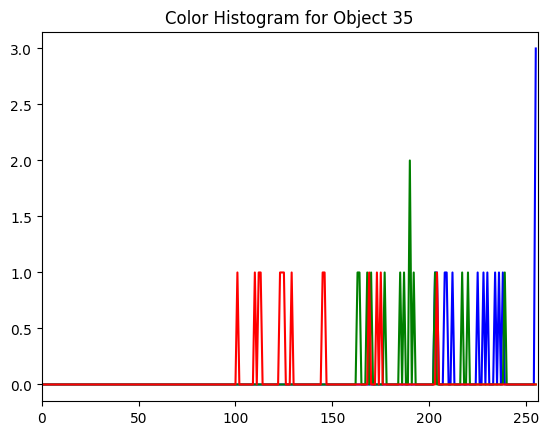

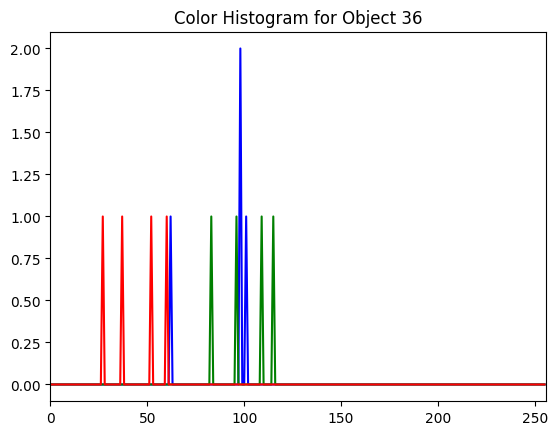

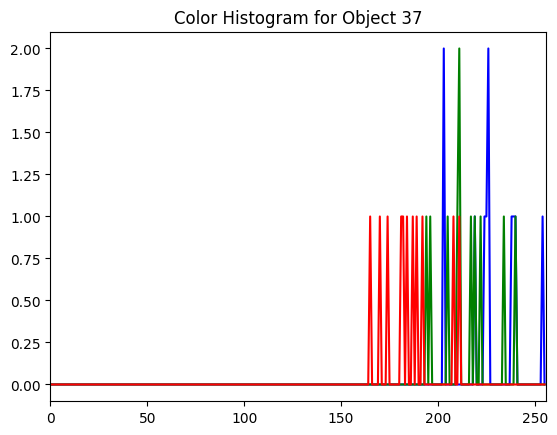

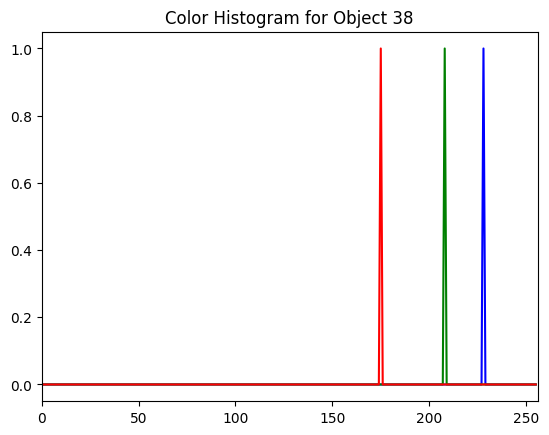

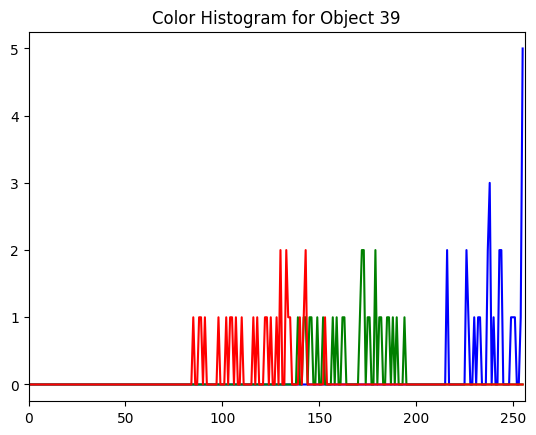

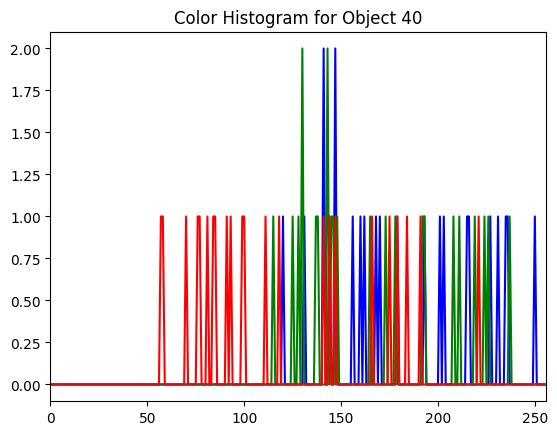

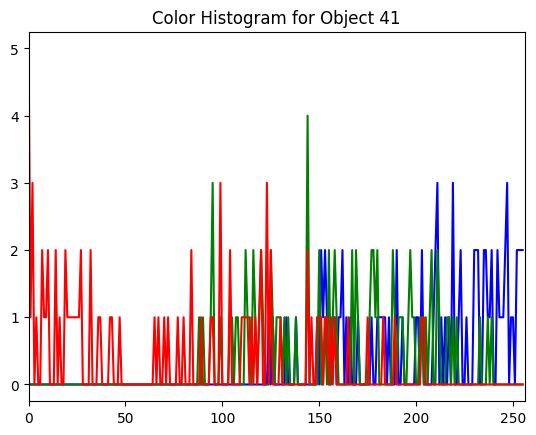

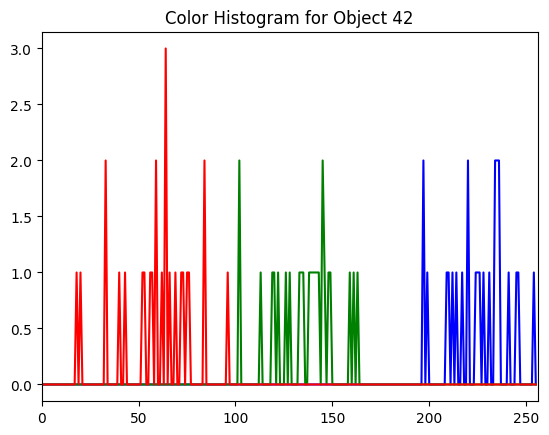

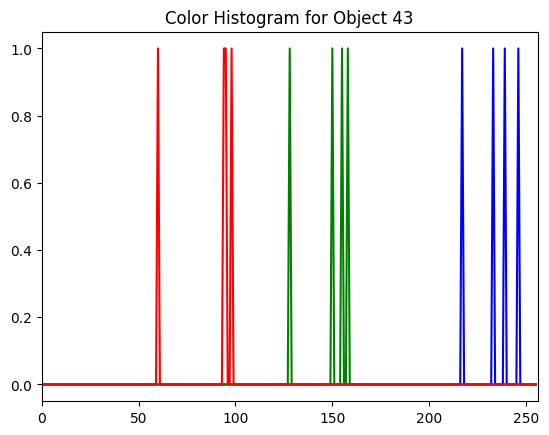

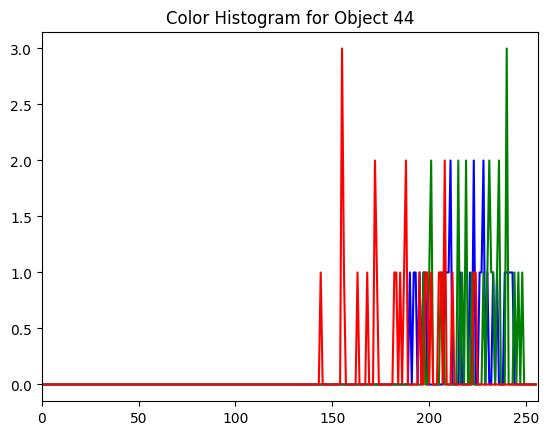

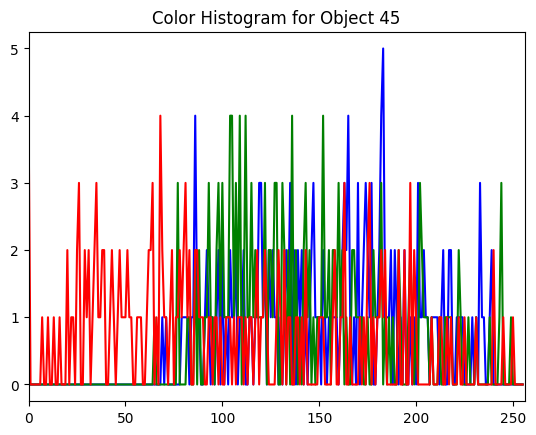

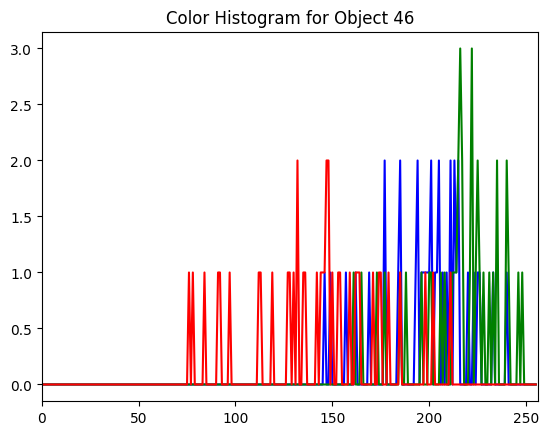

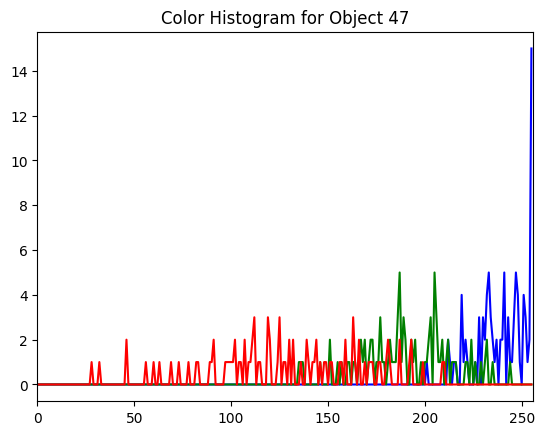

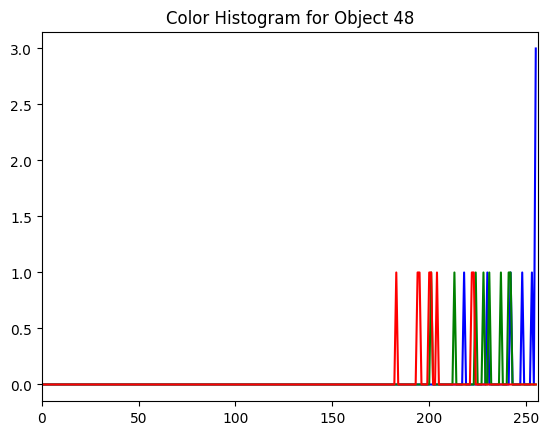

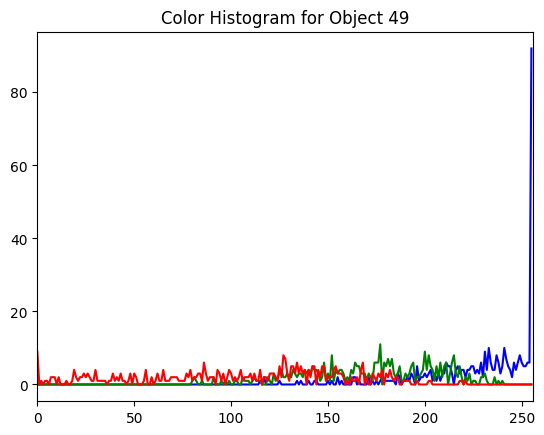

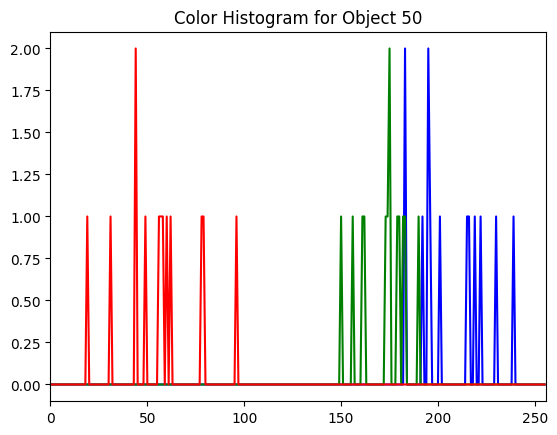

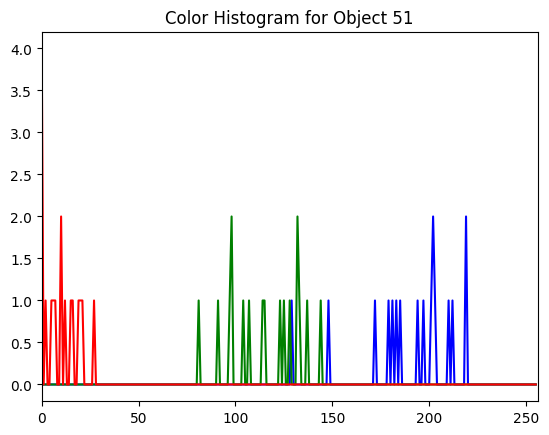

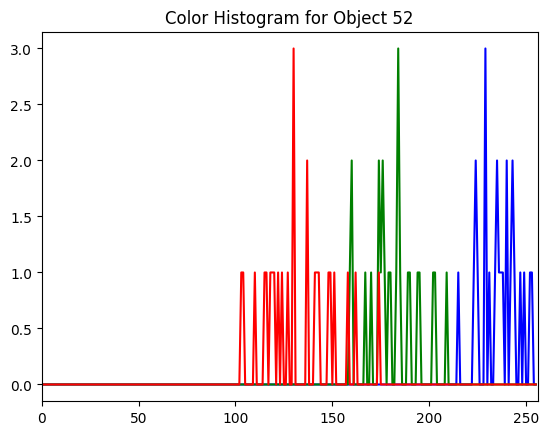

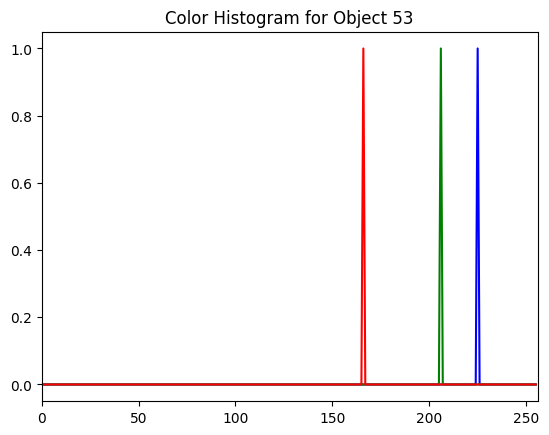

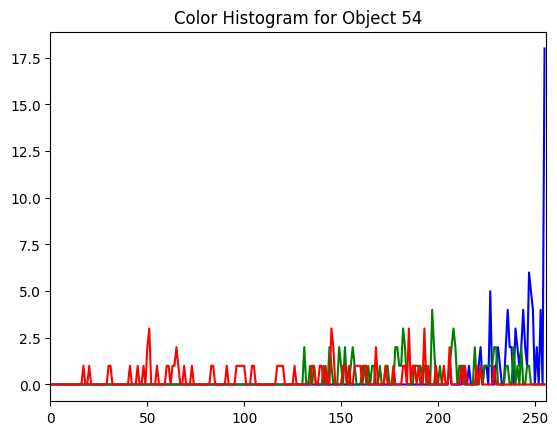

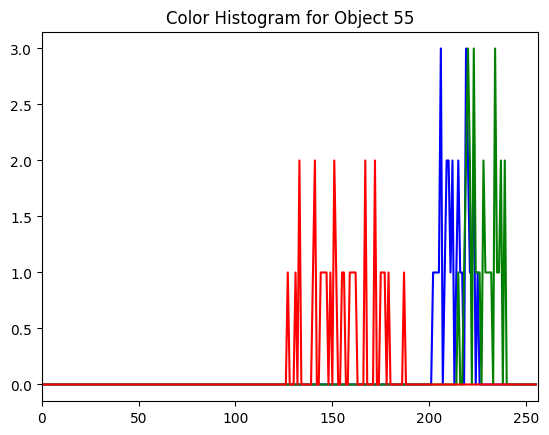

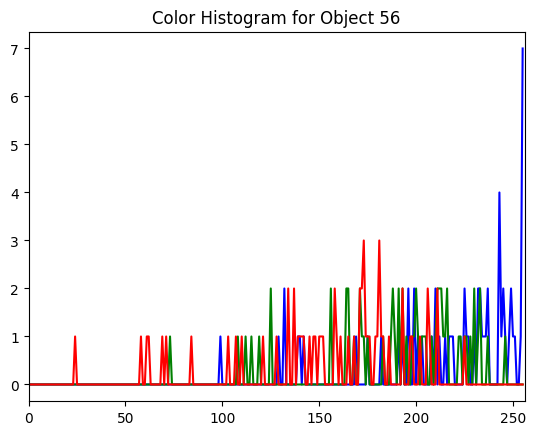

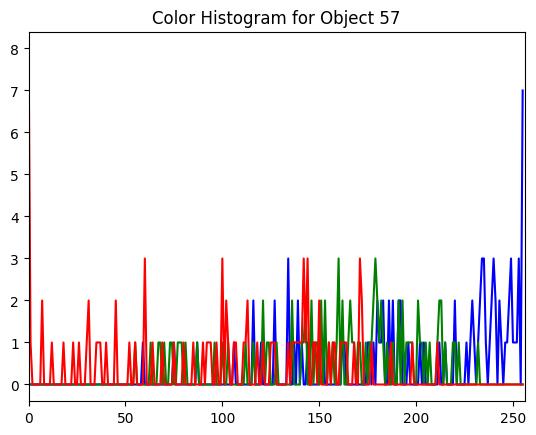

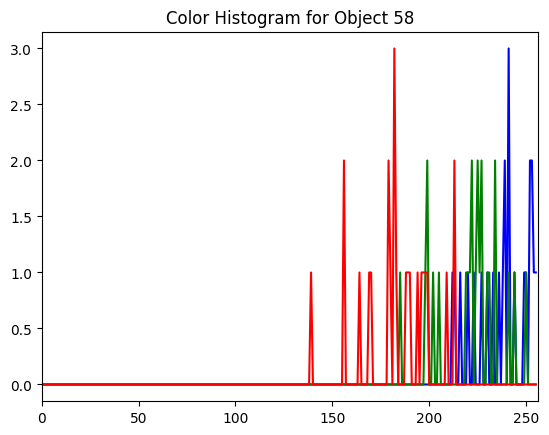

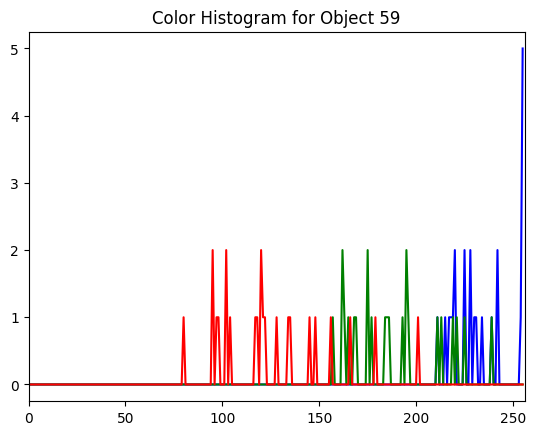

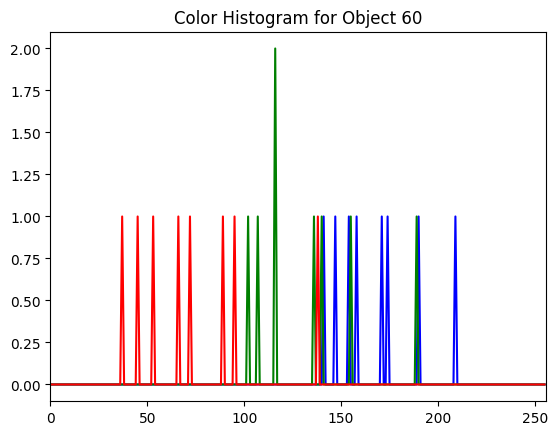

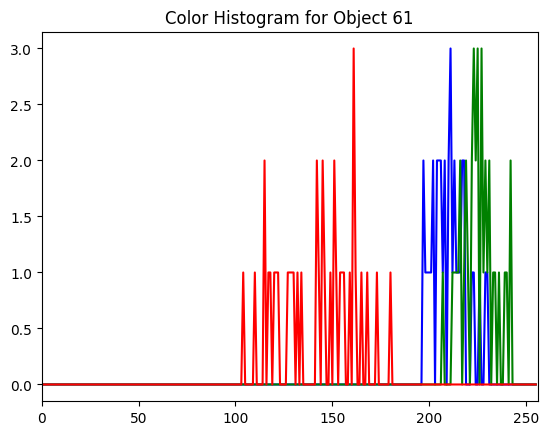

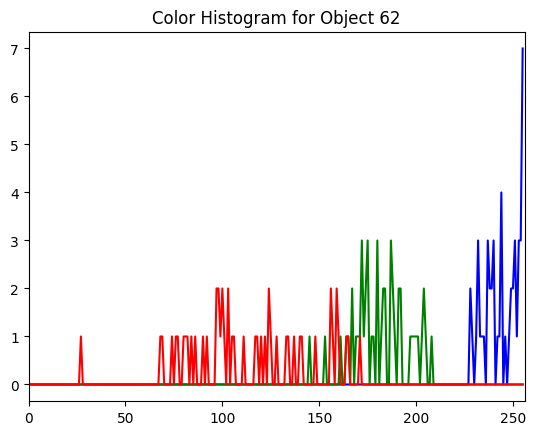

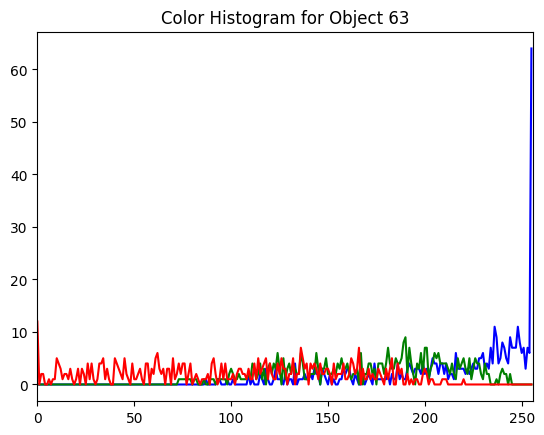

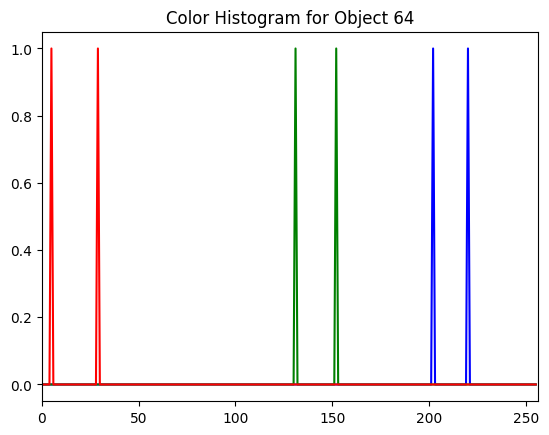

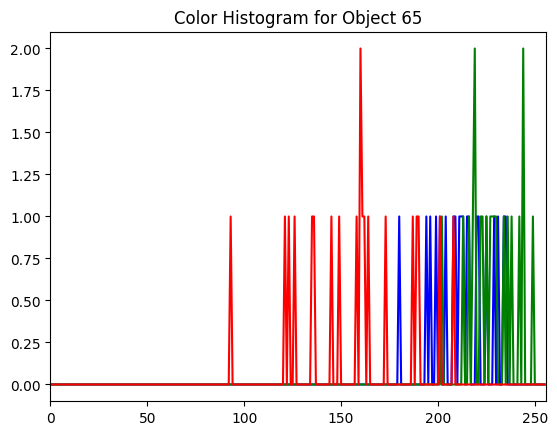

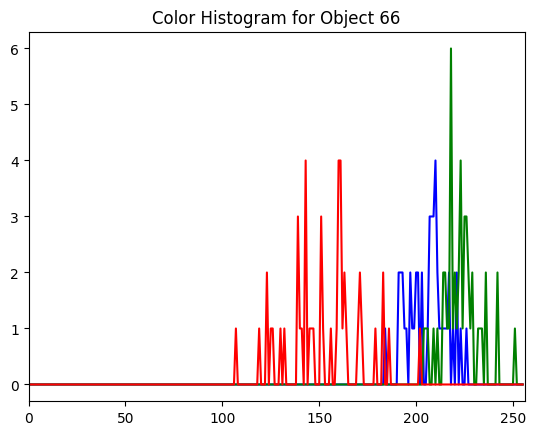

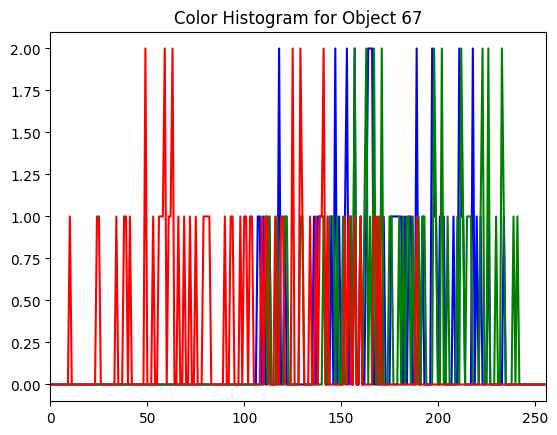

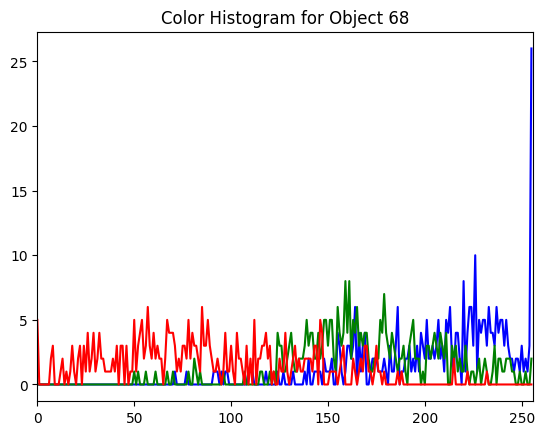

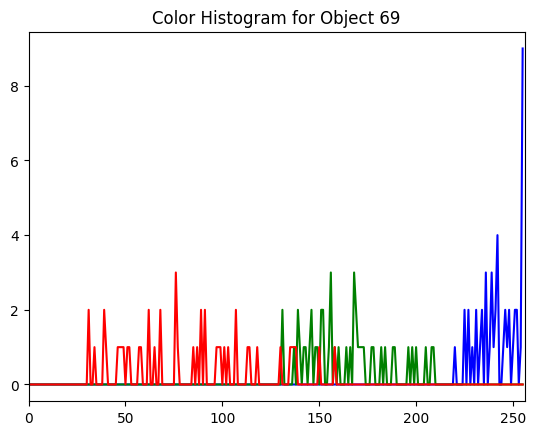

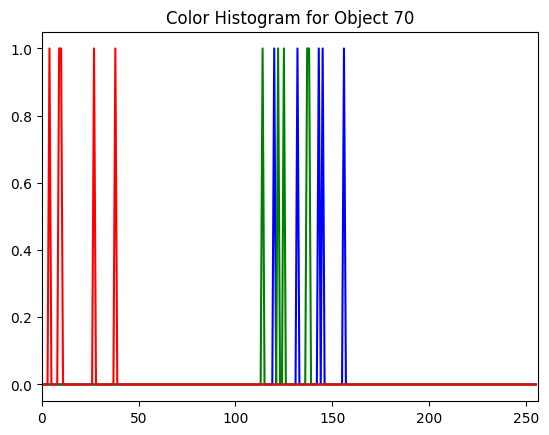

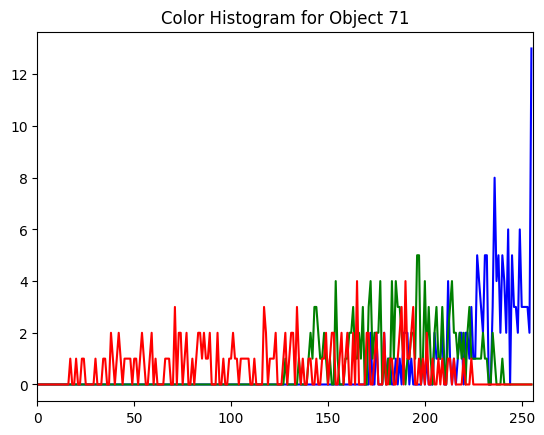

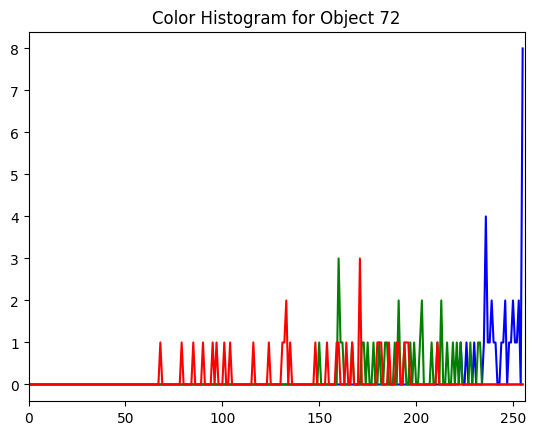

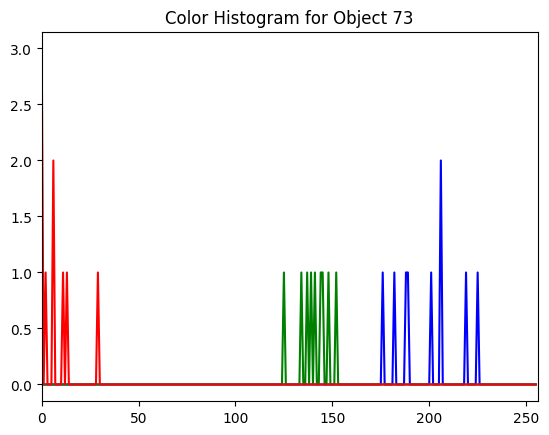

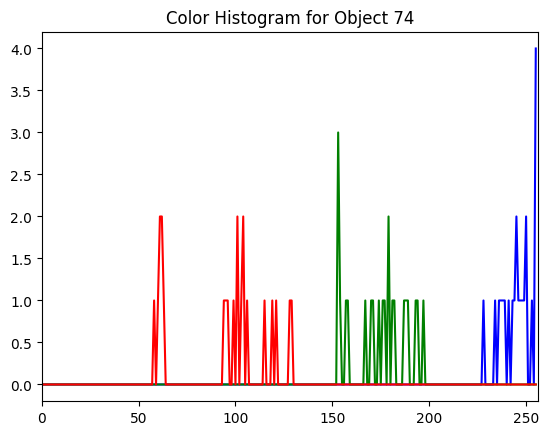

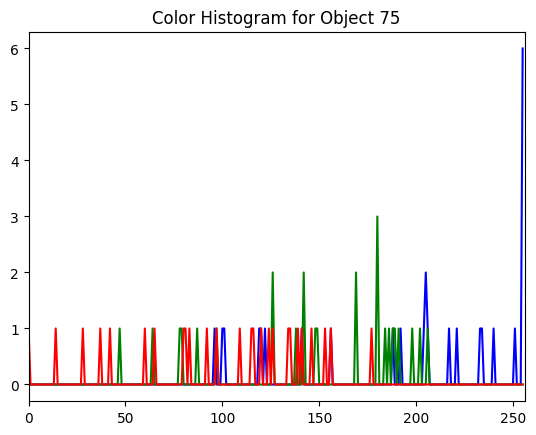

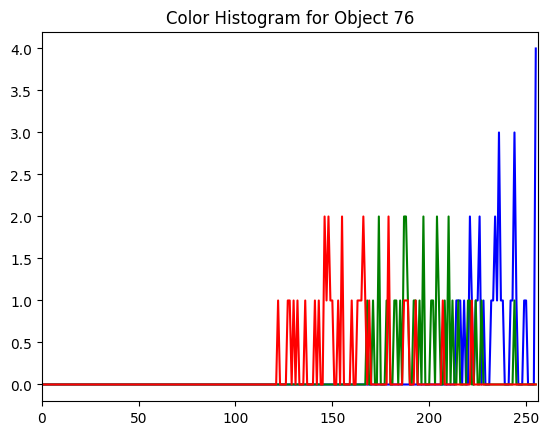

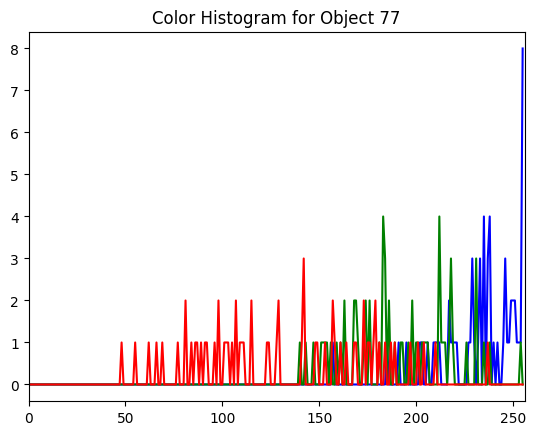

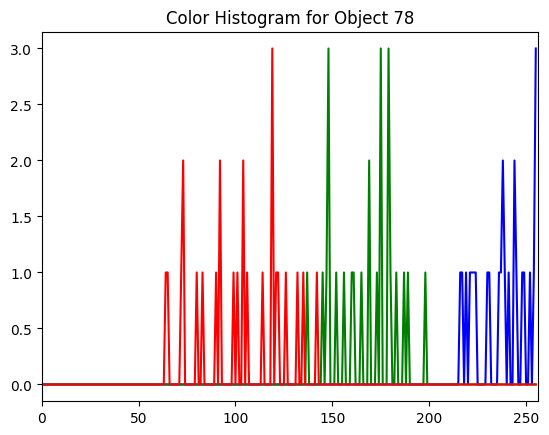

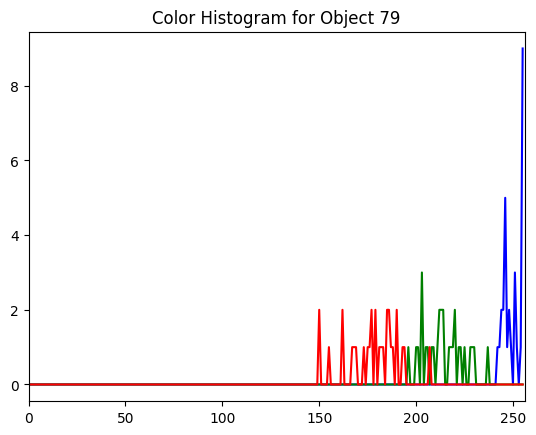

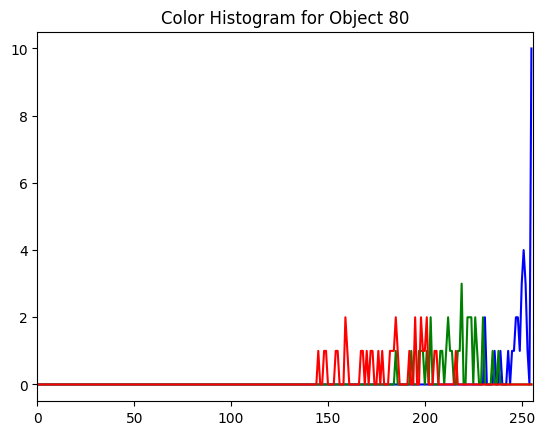

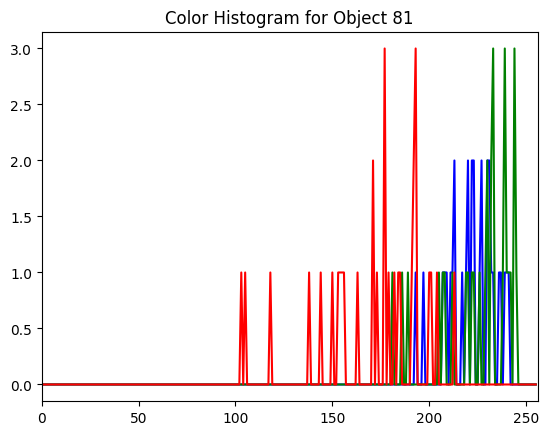

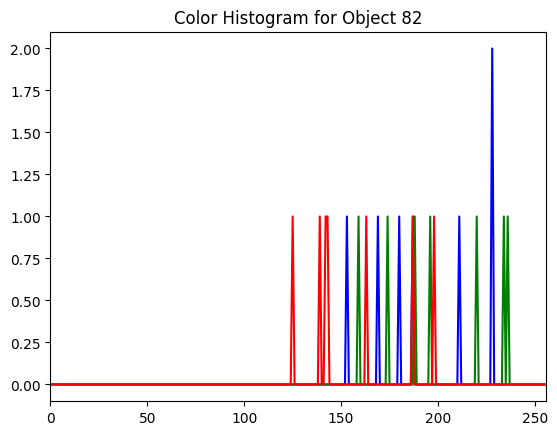

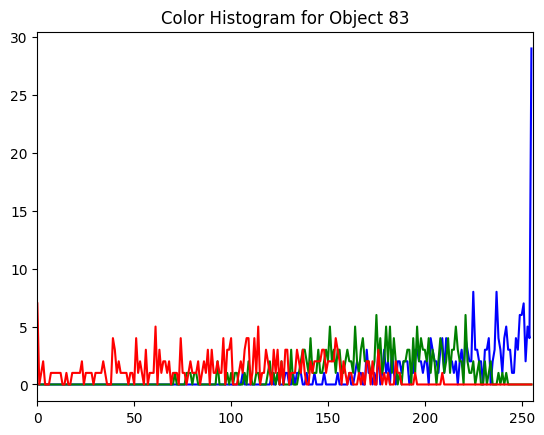

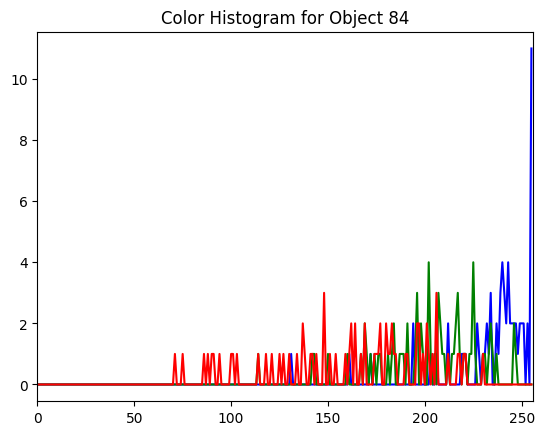

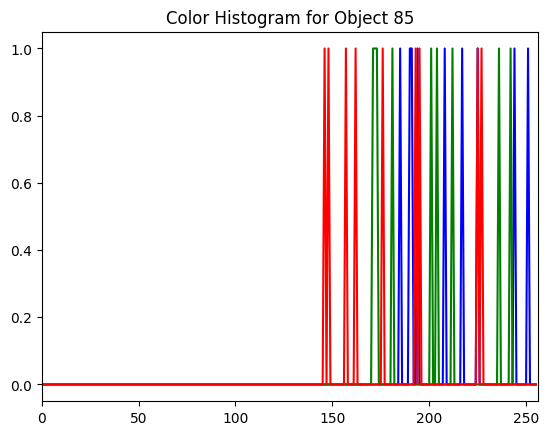

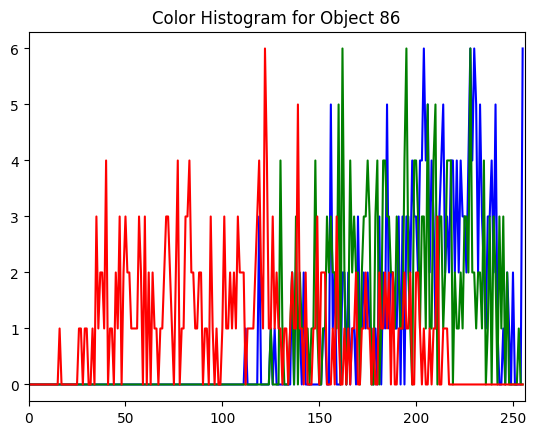

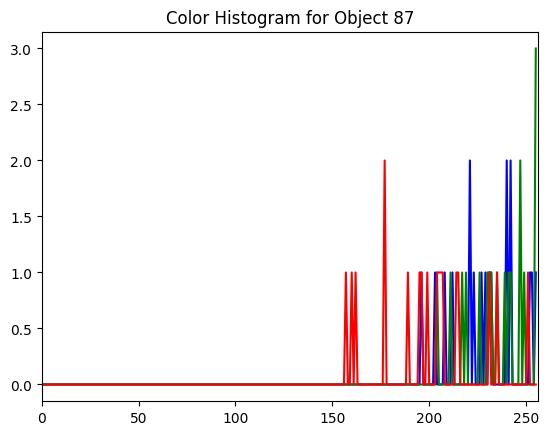

In [29]:
for i, contour in enumerate(contours):
    # Create a mask for the object
    mask = np.zeros(image_rgb.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)
    
    # Compute color histograms for each channel
    hist_b = cv2.calcHist([image_rgb], [0], mask, [256], [0, 256])
    hist_g = cv2.calcHist([image_rgb], [1], mask, [256], [0, 256])
    hist_r = cv2.calcHist([image_rgb], [2], mask, [256], [0, 256])
    
    # Plot the histograms
    plt.figure()
    plt.title(f'Color Histogram for Object {i+1}')
    plt.plot(hist_b, color='blue')
    plt.plot(hist_g, color='green')
    plt.plot(hist_r, color='red')
    plt.xlim([0, 256])
    plt.show()


Best match found for object 49 with similarity 1536.536028425043


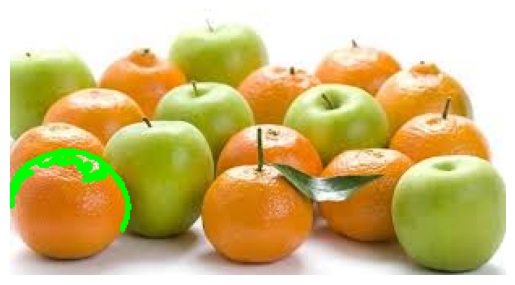

In [45]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Load the reference image and target image
reference_image_path = "C:/Users/ASUS/Downloads/reference.jpeg"
target_image_path = "C:/Users/ASUS/Downloads/images (2).jpeg"

reference_image = cv2.imread(reference_image_path, cv2.IMREAD_COLOR)
target_image = cv2.imread(target_image_path, cv2.IMREAD_COLOR)

# Convert images to grayscale
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

# Step 1: Segment the Reference and Target Images
# Example segmentation using Canny edge detection
reference_edges = cv2.Canny(reference_gray, 100, 200)
target_edges = cv2.Canny(target_gray, 100, 200)

# Step 2: Extract Features from the Reference Object
reference_features = {
    "area": cv2.countNonZero(reference_edges),
    "perimeter": cv2.arcLength(cv2.findContours(reference_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0], True),
    "edges": reference_edges,
    "edges_hist": cv2.calcHist([reference_edges], [0], None, [256], [0, 256])
}

reference_features["edges_hist"] = cv2.normalize(reference_features["edges_hist"], reference_features["edges_hist"]).flatten()

# Step 3: Segment Target Image and Extract Features from Each Object
# Find contours in the target image
target_contours, _ = cv2.findContours(target_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

extracted_target_features = []

for contour in target_contours:
    # Compute area and perimeter
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Extract edges and calculate histogram
    mask = np.zeros(target_image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)
    edges = cv2.Canny(mask, 100, 200)
    edges_hist = cv2.calcHist([edges], [0], None, [256], [0, 256])
    
    # Normalize edge histogram for comparison
    edges_hist = cv2.normalize(edges_hist, edges_hist).flatten()

    # Store the features in a dictionary
    target_features = {
        "area": area,
        "perimeter": perimeter,
        "edges": edges,
        "edges_hist": edges_hist
    }

    extracted_target_features.append(target_features)

# Step 4: Define Similarity Measures
def euclidean_distance(feature_vec1, feature_vec2):
    return distance.euclidean(feature_vec1, feature_vec2)

def compare_histograms(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

def calculate_similarity(reference_features, target_features):
    shape_similarity = euclidean_distance(
        [reference_features["area"], reference_features["perimeter"]],
        [target_features["area"], target_features["perimeter"]]
    )
    
    edge_hist_similarity = compare_histograms(
        reference_features["edges_hist"], target_features["edges_hist"]
    )
    
    total_similarity = shape_similarity + edge_hist_similarity
    return total_similarity

# Step 5: Locate and Identify the Object
best_match_idx = -1
best_match_similarity = float('inf')  # Assuming lower similarity score is better

for i, target_features in enumerate(extracted_target_features):
    similarity = calculate_similarity(reference_features, target_features)
    
    if similarity < best_match_similarity:
        best_match_similarity = similarity
        best_match_idx = i

# If a match is found, locate and highlight the object
if best_match_idx != -1:
    best_match_contour = target_contours[best_match_idx]
    cv2.drawContours(target_image, [best_match_contour], -1, (0, 255, 0), 2)
    print(f"Best match found for object {best_match_idx + 1} with similarity {best_match_similarity}")
else:
    print("No matching object found.")

# Step 6: Visualize the Results
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
